# **Maestría en Inteligencia Artificial Aplicada (MNA)**
## **Procesamiento de Lenguaje Natural (NLP)**
### Prof. Luis Eduardo Falcón Morales
### **Semanas 6 y 7 - Modelado de Temas: LSI / LDA.**



**Nombre**: Daniela Sánchez

**Matrícula**: A01749492

**Nombre**: Esteban Sánchez

**Matrícula**: A01740631

**Nombre**: Francisco Rupit

**Matrícula**: A01795106

**Nombre**: Bruno Sánchez García

**Matricula**: A01378960

**Nombre**:Jose Antonio Saenz

**Matricula**: A01793884

1.-Descarga el archivo noticiasTopicModeling.txt que se encuentra en Canvas. Este archivo consiste en
5658 noticias de varios periódicos de España. El archivo de texto es una lista en el siguiente
formato:
 [{“titular”:”Encabezado“, “texto”:”Cuerpo”}, … , {“titular”:”Encabezado”,”texto”:”Cuerpo”}]
Donde “titular” es el encabezado de la noticia y “texto” es el cuerpo del texto de dicha noticia. En
particular en esta actividad trabajarás solamente con los cuerpos de las noticias, sin incluir los
encabezados. Carga dicho archivo y genera un DataFrame de Pandas llamado “df” y que contiene
una única columna llamada “noticia” con 5658 renglones formados por los cuerpos de las noticias.


In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
separacion = pd.read_csv('/content/noticiasTopicModeling.txt',sep= '},',header=None, encoding='utf-8', engine="python")

In [ ]:
columna=separacion.T.rename(columns={0:"noticias"})

In [ ]:
columna

,noticias
0,"[{""titular"": ""Vox se sube a la ola de la extre..."
1,"{""titular"": ""Mensajes xen\u00f3fobos de Vox y..."
2,"{""titular"": ""El Gobierno alega el estado de a..."
3,"{""titular"": ""La fiscala"", ""texto"": ""Puedes ma..."
4,"{""titular"": ""La CorteIDH pide a Panam\u00e1 i..."
...,...
5653,"{""titular"": ""El juez del caso Villarejo cita ..."
5654,"{""titular"": ""El perfil del contagiado de coro..."
5655,"{""titular"": ""Transferencias, pr\u00e9stamos y..."
5656,"{""titular"": ""23 libros que correremos a busca..."


In [ ]:
texto=columna["noticias"].str.extract(r"\"texto\"\:(.+)")

In [ ]:
texto1=texto.rename(columns={0:"Cuerpo"})

In [ ]:
texto1

,Cuerpo
0,"""\""Espa\u00f1a ha dejado de ser cat\u00f3lica..."
1,"""El clima de crispaci\u00f3n social en Ceuta ..."
2,"""El Gobierno ha alegado la suspensi\u00f3n de..."
3,"""Puedes mandar tu pregunta, sugerencia o quej..."
4,"""Panam\u00e1 debe entregar esta semana a la C..."
...,...
5653,"""El juez del caso Villarejo, Manuel Garc\u00e..."
5654,"""Espa\u00f1a se acerca a los 260.000 casos de..."
5655,"""Transferencias, pr\u00e9stamos y condiciones..."
5656,"""El 14 de marzo, ante la declaraci\u00f3n del..."


2.-Realiza un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado para texto en
español. Recuerda que el objetivo es identificar los tokens (palabras) que describan mejor la
distribución de cada tema.
NOTA: Recuerda que esta es una técnica no supervisada, por lo que no requerimos hacer una
partición de los datos.

In [ ]:
texto2 = texto1['Cuerpo'].apply(lambda text: text.encode('utf-8').decode('unicode-escape'))

In [ ]:
texto2

0        ""España ha dejado de ser católica", decía Ma...
1        "El clima de crispación social en Ceuta ha ll...
2        "El Gobierno ha alegado la suspensión de plaz...
3        "Puedes mandar tu pregunta, sugerencia o quej...
4        "Panamá debe entregar esta semana a la Corte ...
                              ...                        
5653     "El juez del caso Villarejo, Manuel García-Ca...
5654     "España se acerca a los 260.000 casos de COVI...
5655     "Transferencias, préstamos y condiciones. "Nu...
5656     "El 14 de marzo, ante la declaración del esta...
5657     "Madrid, 1 sep (EFE).- Finalmente, septiembre...
Name: Cuerpo, Length: 5658, dtype: object

In [ ]:
lista=texto2.tolist()

In [ ]:
cleancomm=[]

def clean_comm(doc):
          linea=re.sub(r"[-.]"," ", doc)
          alfabetico=re.sub(r"[^a-zA-ZÑñáéíóúÁÉÍÓÚü ]","",linea).lower()
          sinespacios=re.sub(r"\s{2,}"," ",alfabetico).strip()

          return sinespacios

Cleannoticias = [clean_comm(x) for x in lista]
Cleannoticias[0]

'españa ha dejado de ser católica decía manuel azaña al comienzo de la segunda república cuando aquel congreso de los diputados aprobó las leyes laicistas era una metáfora dejó de ser católica sobre el papel de la ley pero no en las creencias de buena parte de su pueblo contra la migración y la integración europea el programa de vox para europa saber más españa este domingo de noviembre ha dejado de ser una excepción en europa por la potencia de la extrema derecha en su parlamento pero también es una metáfora pues precisamente lo excepcional era tener una dictadura a mediados de los setenta y que el dictador aún estuviera en un mausoleo después de años muerto no existía tal cosa ni en portugal grecia italia y alemania países de dictaduras fascistas pero en españa como sí pasó en portugal italia y alemania no se derrotó al fascismo el franquismo murió en la cama y con el harakiri de las cortes franquistas no hubo una ruptura de régimen sino una reforma no nació un nuevo país sino que el

In [ ]:
#$ python -m spacy download en_core_web_sm
! pip install es_core_news_sm
import spacy
lees = spacy.load("es_core_news_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: typer
    Found existing installation: typer 0.9.4
    Uninstalling typer-0.9.4:
      Successfully uninstalled typer-0.9.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.2
    Uninstalling pydantic-2.7.2:
      Successfully uninstalled pydantic-2.7.2
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.3
    Uninstalling thinc-8.2.3:
      Successfully uninstalle

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:747: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:431.)
  _C._set_default_tensor_type(t)


In [ ]:
def lemmatize_list(word_list):
    lemmatized_list = []
    for word in word_list:
        doc = lees(word)
        lemmatized_word = " ".join([token.lemma_ for token in doc])
        lemmatized_list.append(lemmatized_word)
    return lemmatized_list

In [ ]:
lemmatizado = lemmatize_list(Cleannoticias)
print(lemmatizado[0])

españa haber dejar de ser católico decir manuel azaña al comienzo de el segundo república cuando aquel congreso de el diputado aprobar el ley laicista ser uno metáfora dejar de ser católico sobre el papel de el ley pero no en el creencia de buen parte de su pueblo contra el migración y el integración europeo el programa de vox para europa saber más españa este domingo de noviembre haber dejar de ser uno excepción en europa por el potencia de el extremo derecha en su parlamento pero también ser uno metáfora pues precisamente él excepcional ser tener uno dictadura a mediados de el setenta y que el dictador aún estar en uno mausoleo después de año muerto no existir tal cosa ni en portugal grecia italia y alemania país de dictadura fascista pero en españa como él pasar en portugal italia y alemania no él derrotar al fascismo el franquismo morir en el cama y con el harakiri de el corte franquista no haber uno ruptura de régimen sino uno reforma no nacer uno nuevo país sino que el país mutar

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

mystopwords =stopwords.words('spanish')
print(mystopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
palabras=[]
for i in lemmatizado:
            temp=i.split()
            listado=[]
            for p in temp:
                 if p not in mystopwords:
                          listado.append(p)
            palabras.append(listado)

In [ ]:
print(palabras[0:5])

[['españa', 'haber', 'dejar', 'ser', 'católico', 'decir', 'manuel', 'azaña', 'comienzo', 'segundo', 'república', 'aquel', 'congreso', 'diputado', 'aprobar', 'ley', 'laicista', 'ser', 'metáfora', 'dejar', 'ser', 'católico', 'papel', 'ley', 'creencia', 'buen', 'parte', 'pueblo', 'migración', 'integración', 'europeo', 'programa', 'vox', 'europa', 'saber', 'españa', 'domingo', 'noviembre', 'haber', 'dejar', 'ser', 'excepción', 'europa', 'potencia', 'extremo', 'derecha', 'parlamento', 'ser', 'metáfora', 'pues', 'precisamente', 'excepcional', 'ser', 'tener', 'dictadura', 'mediados', 'setenta', 'dictador', 'aún', 'mausoleo', 'después', 'año', 'muerto', 'existir', 'tal', 'cosa', 'portugal', 'grecia', 'italia', 'alemania', 'país', 'dictadura', 'fascista', 'españa', 'pasar', 'portugal', 'italia', 'alemania', 'derrotar', 'fascismo', 'franquismo', 'morir', 'cama', 'harakiri', 'corte', 'franquista', 'haber', 'ruptura', 'régimen', 'sino', 'reforma', 'nacer', 'nuevo', 'país', 'sino', 'país', 'mutar',

In [ ]:
final = []

for articulo in palabras:
    tmp = ' '.join(articulo)
    final.append(tmp)

In [ ]:
final[0:2]

['españa haber dejar ser católico decir manuel azaña comienzo segundo república aquel congreso diputado aprobar ley laicista ser metáfora dejar ser católico papel ley creencia buen parte pueblo migración integración europeo programa vox europa saber españa domingo noviembre haber dejar ser excepción europa potencia extremo derecha parlamento ser metáfora pues precisamente excepcional ser tener dictadura mediados setenta dictador aún mausoleo después año muerto existir tal cosa portugal grecia italia alemania país dictadura fascista españa pasar portugal italia alemania derrotar fascismo franquismo morir cama harakiri corte franquista haber ruptura régimen sino reforma nacer nuevo país sino país mutar ley ley aun así españa parecer vacunado si año franquismo haber ser bastantes haber llegar irrupción posfranquismo tras ser actor fundamental gobierno autonómico local pp ciudadano españa haber dejar ser excepción aunque alianza popular manuel fragar bebiera franquismo sociológico fuerza n

# Parte - 1:  Indexación semántica latente (LSI):


3.-Encontrar la matriz Tf-idf de la columna de noticias. Despliega los primeros 5 renglones con
algunas de sus columnas con sus nombres, donde las columnas son los tokens. ¿Cuál es el
significado de cada renglón? ¿Y el significado de cada columna?

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=3 )
tfidf_sparse = tfidf.fit_transform(final)

In [ ]:
tfidf_dense = pd.DataFrame(tfidf_sparse.toarray(), columns=tfidf.get_feature_names_out())

tfidf_dense.head()

,aa,aalla,aar,aarón,aba,abad,abadi,abadiño,abadía,abajo,...,óxido,úlcera,últimamente,último,únetar,única,únicamente,único,útil,útiles
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.016604,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.025392,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.011758,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
del tfidf_dense

**Respuesta**: Cada renglon representa los documentos o los cuerpos de noticias y cada columna representan los tokens contenidos dentro de estos. Cada elemento es la relación entre los términos o palabras y los documentos.

4.-Aplica el método de descomposición de valores singulares truncado a la matriz Tf-idf anterior con
10 componentes y obtener el gráfico de la importancia relativa de estas.

In [ ]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
r = 10

lsi_obj = TruncatedSVD(n_components = r, n_iter=100, random_state= 0)

tfidf_lsi = lsi_obj.fit_transform(tfidf_sparse)

Sigma = lsi_obj.singular_values_

V_T = lsi_obj.components_.T

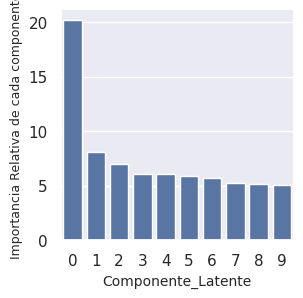

In [ ]:
sns.set(rc={'figure.figsize':(3,3)})
chart = sns.barplot(x=list(range(len(Sigma))), y = Sigma )
chart.set_xlabel('Componente_Latente', fontdict={'size': 10})
chart.set_ylabel('Importancia Relativa de cada componente', fontdict={'size': 9})
plt.show()

5.-Obtener la matriz tokens-temas (term-topic) a partir de la matriz VT
 de la descomposición SVD.
Despliega sus primeros 5 renglones donde se incluya el nombre de las columnas.


In [ ]:
print(V_T.shape)

(27806, 10)


In [ ]:
term_names = list(tfidf.get_feature_names_out())

print(term_names)

['aa', 'aalla', 'aar', 'aarón', 'aba', 'abad', 'abadi', 'abadiño', 'abadía', 'abajo', 'abalanzar', 'aban', 'abanderada', 'abanderado', 'abanderar', 'abandonado', 'abandonar', 'abandonarar', 'abandono', 'abandonser', 'abandoné', 'abanico', 'abaratamiento', 'abaratar', 'abarca', 'abarcar', 'abarrotado', 'abarrotar', 'abascal', 'abastecer', 'abastecido', 'abastecimiento', 'abasto', 'abatido', 'abatir', 'abb', 'abba', 'abc', 'abdalá', 'abdelbaki', 'abdicación', 'abdicar', 'abdo', 'abdomen', 'abdominal', 'abdul', 'abdulaziz', 'abdullah', 'abe', 'abeja', 'abel', 'abellán', 'abenewco', 'abengoa', 'aber', 'aberasturi', 'aberración', 'aberrante', 'aberri', 'aberta', 'aberti', 'abertzalar', 'abertzale', 'abetxuko', 'abierta', 'abiertamente', 'abierto', 'abigail', 'abigarrado', 'abismal', 'abismo', 'abjurar', 'abnegado', 'abocacer', 'abocada', 'abocado', 'abocar', 'abogacir', 'abogacía', 'abogada', 'abogado', 'abogar', 'aboguir', 'abolicionismo', 'abolicionista', 'abolición', 'abolir', 'abonado',

In [ ]:
term_topic_matrix = pd.DataFrame(data=V_T, index = term_names,
                                 columns = [f'C_Latente_{r}' for r in range(0,V_T.shape[1])]
                                )

In [ ]:
term_topic_matrix.head()

,C_Latente_0,C_Latente_1,C_Latente_2,C_Latente_3,C_Latente_4,C_Latente_5,C_Latente_6,C_Latente_7,C_Latente_8,C_Latente_9
aa,0.000192,0.000131,-0.000298,-0.000032,-0.000035,-0.000158,0.000700,-0.000151,-0.000255,-0.000758
aalla,0.000060,-0.000085,-0.000206,0.000196,-0.000040,-0.000055,-0.000097,-0.000121,-0.000115,-0.000057
aar,0.000182,-0.000212,-0.000508,-0.000029,-0.000032,0.000025,0.000391,0.000161,0.000276,-0.000246
aarón,0.000233,-0.000010,-0.000200,-0.000210,-0.000191,-0.000287,-0.000299,-0.000344,-0.000756,0.000196
aba,0.000153,-0.000155,0.000231,-0.000144,-0.000196,-0.000061,0.000592,0.000084,-0.000473,0.000044


6.-Con base a la cantidad de conceptos latentes que determinaste en el ejercicio anterior, obtener cada
uno de sus gráficos con sus 10 términos/tokens más importantes. ¿Cómo describirías cada uno de
dichos conceptos latentes? ¿Se identifican claramente las temáticas de cada uno de ellos?

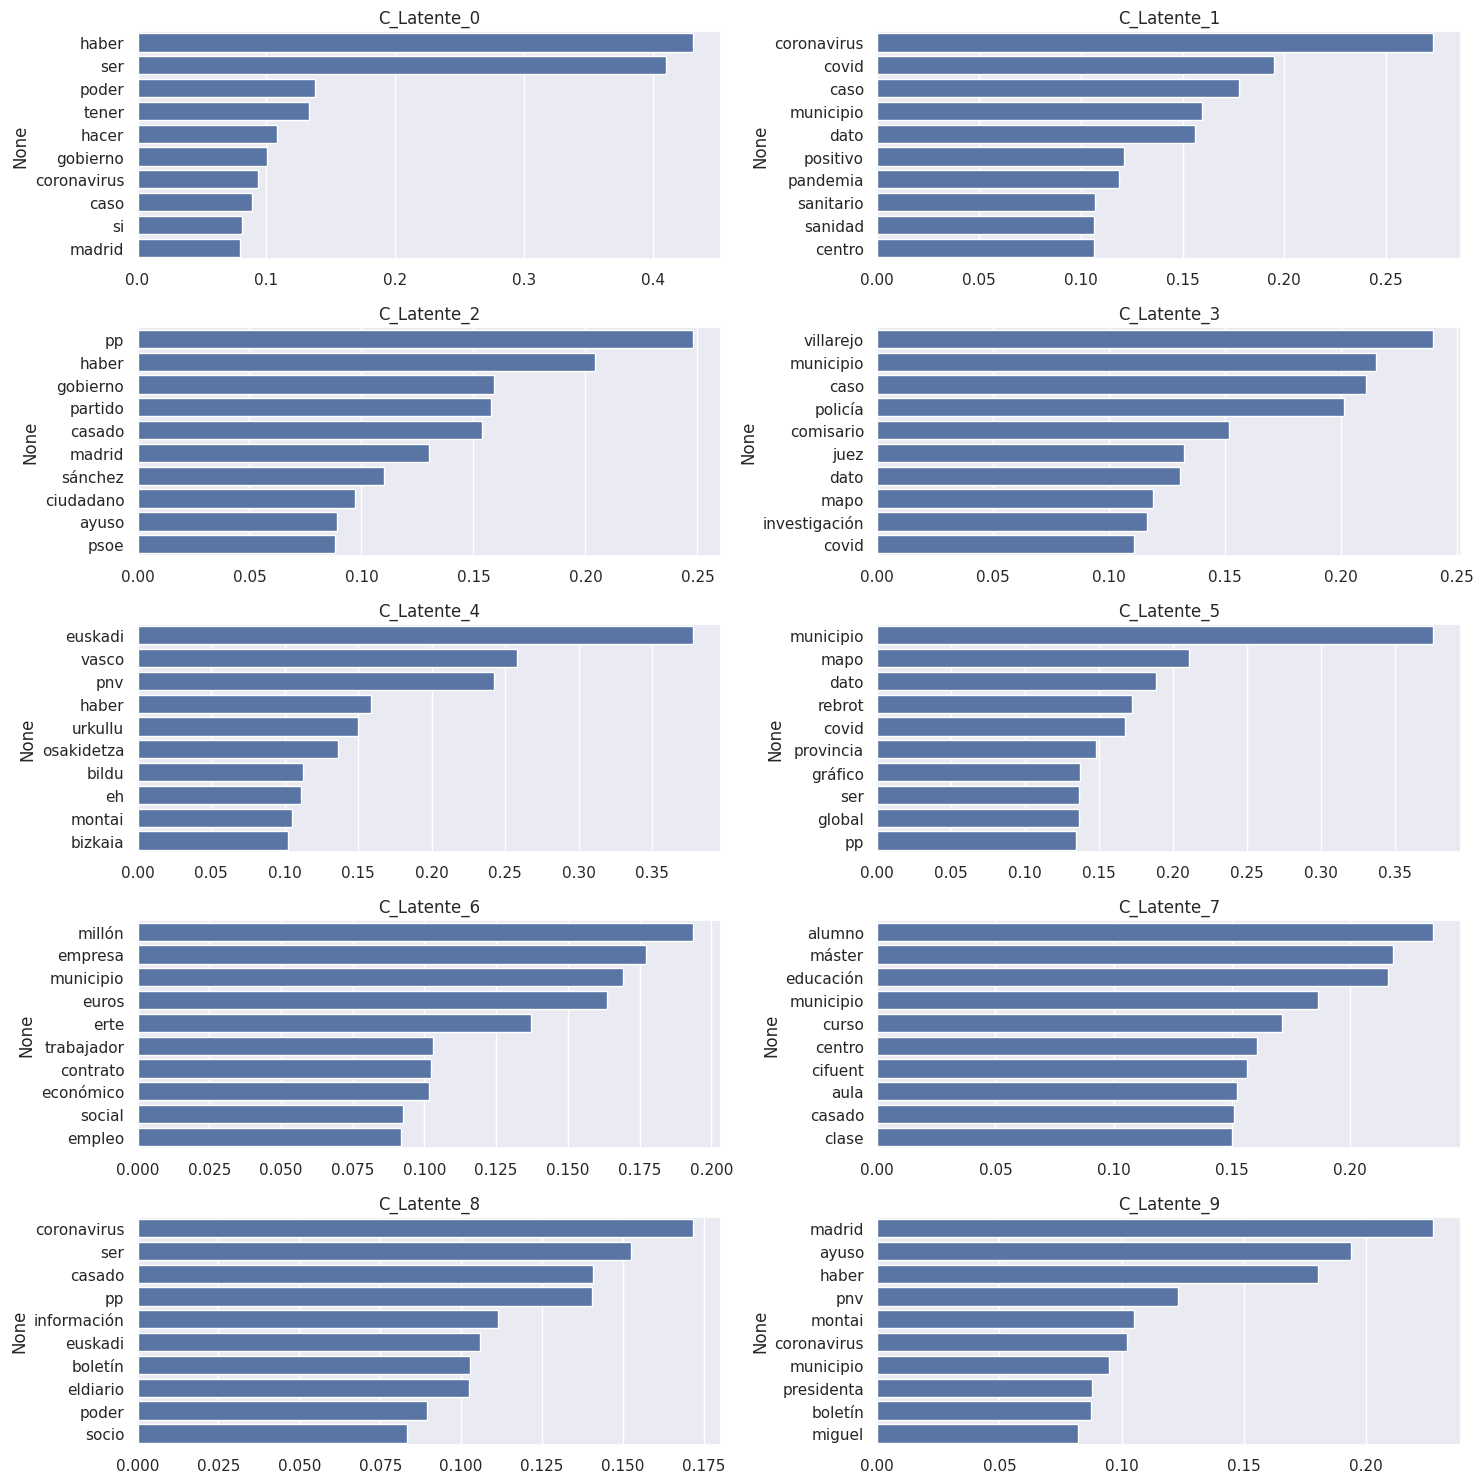

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(15, 15))
axs = axs.flatten()

for i, col in enumerate(term_topic_matrix.columns):
    data = term_topic_matrix[col]
    data = data.sort_values(ascending=False)
    top_w_matrix = data[:10]
    sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

**Respuesta**: Como se puede observar en las gráficas presentadas, existen 4 componentes latentes que podrían representar tópicos específicos de un grupo de noticias.

**C_Latente_1, C_Latente_5**: Se observa que estos dos grupos podrían pertenecer a un tópico relacionado con **casos de infección del coronavirus**, ya que se nota la alta presencia del nombre del virus ("covid/coronavirus") seguido de palabras como "caso", "rebrote", "global", "investigación", "dato" y "municipio".

**C_Latente_6**: Este topico tiene una definición más claro, ya que teniendo palabras como "millón", "empresa" "euros" y "trabajador", se entiende que se estan agrupando aquellas noticias relacionadas con **"economia" y "mundo laboral"**.

**C_Latente_7**: Al igual que el 6, este tópico tiene una definición más clara, puesto que se observan palabras como "alumno", "master", "educación", "curso", "aula"; lo que claramente indica un conjunto de notcias relacionadas con la **Educación**

# Parte 2: Asignación de Dirichlet Latente (LDA):

7.-Utiliza la librería Gensim para implementar ahora la técnica de LDA. Revisa la documentación
correspondiente y aplica de preferencia el modelo paralelizable:

https://radimrehurek.com/gensim/models/ldamodel.html

https://radimrehurek.com/gensim/models/ldamulticore.html


In [ ]:
import gensim
import gensim.corpora as corpora

In [ ]:
id2word = corpora.Dictionary(palabras)

for id in range(15):
    print(id2word[id])

abascal
abril
actor
afd
ahora
alemania
alemán
alguno
alianza
amigo
amplio
apresurar
aprobar
aquel
así


In [ ]:
corpus = [id2word.doc2bow(palabra) for palabra in palabras]


In [ ]:
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                    id2word=id2word,
                    num_topics=10,      # total de tópicos que deseas buscar...
                    chunksize=100,    # número de documentos a analizar en cada chunk de entrenamiento
                    passes=10,        # número de pasadas al corpus durante el entrenamiento.
                    alpha=0.2,        # alfa: similaridad document-topics
                    eta=0.2,         # beta: similaridad topic-words
                    random_state= 0)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
lda_model.print_topics(num_topics=10, num_words=10)

[(0,
  '0.013*"rey" + 0.012*"juan" + 0.011*"carlos" + 0.009*"i" + 0.007*"bankia" + 0.007*"millón" + 0.006*"emérito" + 0.006*"vasco" + 0.006*"guerra" + 0.005*"fundación"'),
 (1,
  '0.031*"haber" + 0.019*"ser" + 0.018*"vasco" + 0.018*"euskadi" + 0.013*"pnv" + 0.008*"miguel" + 0.007*"caso" + 0.006*"navarra" + 0.006*"vitoria" + 0.006*"urkullu"'),
 (2,
  '0.011*"i" + 0.009*"per" + 0.007*"valncia" + 0.003*"amb" + 0.003*"segur" + 0.002*"més" + 0.002*"plaa" + 0.002*"com" + 0.002*"major" + 0.002*"lajuntament"'),
 (3,
  '0.054*"ser" + 0.018*"haber" + 0.012*"tener" + 0.011*"hacer" + 0.010*"poder" + 0.007*"año" + 0.006*"mujer" + 0.005*"ver" + 0.005*"decir" + 0.005*"ir"'),
 (4,
  '0.022*"haber" + 0.019*"ser" + 0.013*"poder" + 0.010*"tener" + 0.009*"persona" + 0.008*"centro" + 0.007*"trabajo" + 0.007*"medida" + 0.007*"trabajador" + 0.006*"deber"'),
 (5,
  '0.015*"haber" + 0.010*"ser" + 0.006*"país" + 0.005*"año" + 0.005*"persona" + 0.004*"día" + 0.004*"guerra" + 0.004*"dos" + 0.004*"civil" + 0.004*"

In [ ]:
lda_model2 = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                    id2word=id2word,
                    num_topics=5,      # total de tópicos que deseas buscar...
                    chunksize=100,    # número de documentos a analizar en cada chunk de entrenamiento
                    passes=10,        # número de pasadas al corpus durante el entrenamiento.
                    alpha=0.2,        # alfa: similaridad document-topics
                    eta=0.2,         # beta: similaridad topic-words
                    random_state= 0)

lda_model2.print_topics(num_topics=5, num_words=10)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[(0,
  '0.016*"ser" + 0.015*"haber" + 0.009*"millón" + 0.007*"año" + 0.006*"país" + 0.004*"españa" + 0.004*"tener" + 0.004*"euros" + 0.004*"según" + 0.004*"europeo"'),
 (1,
  '0.046*"haber" + 0.028*"ser" + 0.013*"gobierno" + 0.011*"poder" + 0.008*"partido" + 0.008*"tener" + 0.007*"pp" + 0.007*"hacer" + 0.006*"político" + 0.004*"decir"'),
 (2,
  '0.033*"haber" + 0.025*"ser" + 0.011*"poder" + 0.009*"coronavirus" + 0.009*"tener" + 0.009*"caso" + 0.008*"persona" + 0.007*"día" + 0.006*"si" + 0.006*"centro"'),
 (3,
  '0.048*"ser" + 0.020*"haber" + 0.010*"tener" + 0.010*"hacer" + 0.009*"poder" + 0.006*"año" + 0.005*"decir" + 0.005*"mujer" + 0.005*"ir" + 0.005*"si"'),
 (4,
  '0.022*"ser" + 0.019*"haber" + 0.009*"caso" + 0.006*"policía" + 0.005*"poder" + 0.005*"investigación" + 0.005*"tribunal" + 0.005*"año" + 0.005*"juez" + 0.004*"según"')]

In [ ]:
lda_model3 = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                    id2word=id2word,
                    num_topics=3,      # total de tópicos que deseas buscar...
                    chunksize=100,    # número de documentos a analizar en cada chunk de entrenamiento
                    passes=10,        # número de pasadas al corpus durante el entrenamiento.
                    alpha=0.2,        # alfa: similaridad document-topics
                    eta=0.2,         # beta: similaridad topic-words
                    random_state= 0)

lda_model3.print_topics(num_topics=3, num_words=10)

[(0,
  '0.040*"ser" + 0.018*"haber" + 0.009*"tener" + 0.008*"hacer" + 0.007*"poder" + 0.006*"año" + 0.004*"decir" + 0.004*"mujer" + 0.004*"ver" + 0.004*"ir"'),
 (1,
  '0.034*"haber" + 0.026*"ser" + 0.009*"poder" + 0.009*"gobierno" + 0.006*"tener" + 0.006*"pp" + 0.006*"partido" + 0.006*"hacer" + 0.005*"político" + 0.004*"caso"'),
 (2,
  '0.032*"haber" + 0.024*"ser" + 0.010*"poder" + 0.009*"tener" + 0.007*"coronavirus" + 0.006*"caso" + 0.006*"persona" + 0.005*"día" + 0.005*"hacer" + 0.005*"si"')]

8.-Con base a esta técnica ¿qué cantidad de tópicos consideras que es la más adecuada? Compara tus
resultados con el método LSI. ¿Qué encuentras de coincidencias y diferencias? ¿Cuál consideras
puede ser el mejor resultado, es decir, cuál consideras puede ser la mejor cantidad de tópicos a
considerar?


**Respuesta:**
Como se pudo observar al amplicar LDA con 5 tópicos es como se obtienen mejor separación de los términos. En este modelo se podrían definir 4 temas específicos acorde a las 10 palabras más comunes de la siguiente manera:
0 - Economía Global/Nacional
1 - Política Nacional
2 - Casos de Coronavirus
4 - Legal/Jurídico

Usando LDA se obtuvo un resultado similar al de LSI al tener 4 tópicos claros. La diferencia radíca en que sintacticamente difieren bastante pues los únicos dos tópicos presentes en ambos serían el de Economía y el de Coronavirus.
Aun así en LSI se encontraron varios tópicos muy dispersos y poco específicos lo que indicaría que es más apropiado buscar 5 tópicos para terminos de resolución de esta problemática.

# Nota: El siguiente experimento se realizo posterior a la conclusión anterior.

In [ ]:
lda_model4 = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                    id2word=id2word,
                    num_topics=10,      # total de tópicos que deseas buscar...
                    chunksize=50,    # número de documentos a analizar en cada chunk de entrenamiento
                    passes=10,        # número de pasadas al corpus durante el entrenamiento.
                    alpha=0.3,        # alfa: similaridad document-topics
                    eta=0.3,         # beta: similaridad topic-words
                    random_state= 0)


lda_model4.print_topics(num_topics=10, num_words=10)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[(0,
  '0.010*"vasco" + 0.009*"guerra" + 0.007*"japonés" + 0.006*"navarro" + 0.004*"mogán" + 0.003*"sarasola" + 0.003*"room" + 0.003*"sancho" + 0.003*"mate" + 0.002*"beurko"'),
 (1,
  '0.036*"haber" + 0.025*"ser" + 0.012*"coronavirus" + 0.012*"caso" + 0.010*"poder" + 0.009*"día" + 0.008*"persona" + 0.008*"tener" + 0.007*"centro" + 0.007*"comunidad"'),
 (2,
  '0.024*"educación" + 0.019*"alumno" + 0.019*"curso" + 0.015*"aula" + 0.015*"clase" + 0.014*"máster" + 0.014*"educativo" + 0.013*"cifuent" + 0.013*"universidad" + 0.010*"profesor"'),
 (3,
  '0.051*"ser" + 0.019*"haber" + 0.012*"tener" + 0.011*"hacer" + 0.010*"poder" + 0.006*"año" + 0.006*"decir" + 0.006*"ir" + 0.005*"ver" + 0.005*"mujer"'),
 (4,
  '0.013*"euros" + 0.011*"miguel" + 0.011*"juan" + 0.011*"empresa" + 0.010*"contrato" + 0.010*"adjudicación" + 0.009*"rey" + 0.009*"montai" + 0.008*"carlos" + 0.007*"millón"'),
 (5,
  '0.008*"país" + 0.004*"civil" + 0.004*"dos" + 0.004*"unidos" + 0.004*"policía" + 0.004*"haber" + 0.004*"guer

Posterior a los resultados anteriores, se realizaron experimentos variando los demás valores del modelo.
Se consideró de interes incluir los resultados de este modelo, ya que como se puede observar, aqui tenemos más tópicos especificos, teniendo un total de 6, los cuáles se pueden definir de la siguiente manera:

0 - Coronavirus

2 - Educación

5 - Política Global

7 - Política Interna

8 - Violencia de Género

9 - Economía

En este caso se puede observar como tenémos resultados más similares al LSI (Topicos: "Coronavirus", "Educación" y "Economía" altamente coincidentes), lo que indica una reafirmación de los 3 potenciales grupos de noticias.

9.-Incluye tus conclusiones finales de la actividad.

Para este entregable, realizamos un análisis de modelado de temas usando *Indexación Semántica Latente (LSI)* y *Asignación de Dirichlet Latente (LDA)*. La limpieza y preparación del texto fueron muy importantes, pues nos permitieron identificar las palabras significativas que debían representar los temas latentes. Al momento de aplicar LSI, convertimos los textos en una matriz Tf-idf y usamos la *Descomposición en Valores Singulares (SVD)* para identificar componentes latentes. Vimos que cada componente se describía por un conjunto de términos, facilitando la interpretación de los temas. En cambio, al utilizar LDA con Gensim, identificamos tópicos de manera eficiente y encontramos que LDA proporcionaba una agrupación de temas más coherente y ajustada.

Comparando LSI y LDA, vimos que la primera es útil para reducir dimensionalidad y encontrar componentes latentes, mientras que LDA genera tópicos más interpretables. Ambas técnicas resaltaron términos clave, pero LDA estructuró los tópicos de manera más clara. Además, notamos que los verbos tienden a "contaminar" la agrupación de tópicos debido a su frecuencia y variabilidad, por lo que considerar técnicas adicionales para minimizar su impacto puede mejorar la precisión.

En conclusión, **combinar las técnicas LSI y LDA proporciona una visión integral de los temas en un corpus textual**. El preprocesamiento del texto y la mitigación del impacto de los verbos son cruciales para mejorar los resultados.